In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
# Basic Sine-Cos functions

In [3]:
x = np.linspace(0,2*np.pi,100)

In [4]:
y1 = np.sin(x)
y2 = np.sin(2*x)
y3 = 2*np.sin(x)

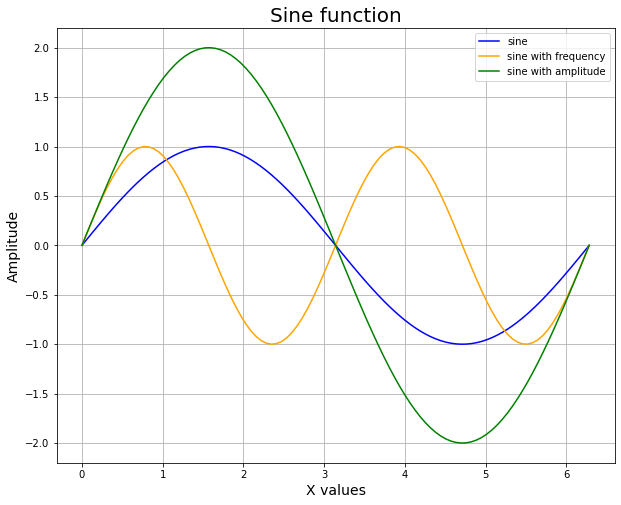

In [5]:
plt.figure (figsize = (10,8))
plt.plot(x,y1, label = "sine" , color = "blue")
plt.plot(x,y2, label = "sine with frequency" , color = "orange")
plt.plot(x,y3, label = "sine with amplitude" , color = "green")
plt.title("Sine function", fontsize = 20)
plt.xlabel("X values", fontsize = 14)
plt.ylabel("Amplitude", fontsize = 14)
plt.legend()
plt.grid()
plt.show()

In [6]:
y4 = np.cos(x)
y5 = np.cos(2*x)
y6 = 2*np.cos(x)

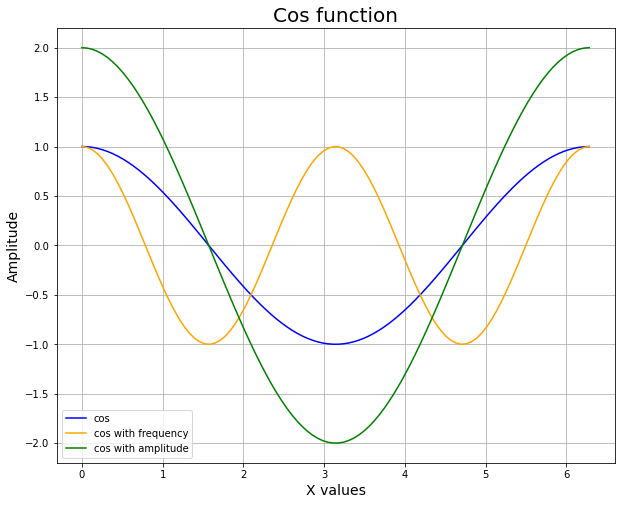

In [7]:
plt.figure (figsize = (10,8))
plt.plot(x,y4, label = "cos" , color = "blue")
plt.plot(x,y5, label = "cos with frequency" , color = "orange")
plt.plot(x,y6, label = "cos with amplitude" , color = "green")
plt.title("Cos function", fontsize = 20)
plt.xlabel("X values", fontsize = 14)
plt.ylabel("Amplitude", fontsize = 14)
plt.legend()
plt.grid()
plt.show()

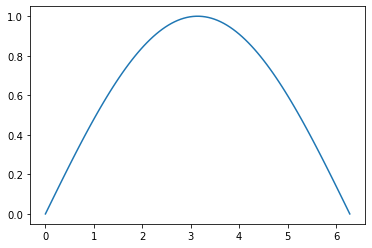

In [6]:
# gaussian

x = np.linspace(0,2*np.pi,100)
y = np.sin(x/2)
plt.plot(x,y)

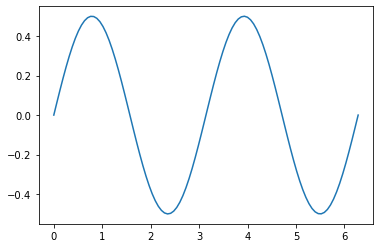

In [8]:
#Adding sin and cos functions

p = np.linspace(0,2*np.pi,100)
q = np.sin(x) * np.cos(x)
plt.plot(p,q)

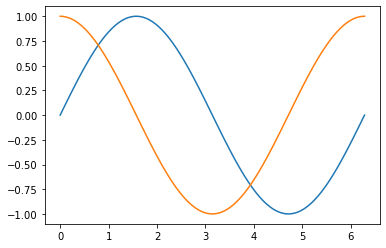

In [9]:
y1 = np.sin(x)
y4 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y4)

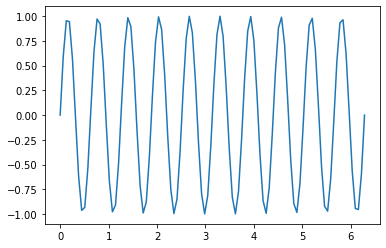

In [10]:
y7 = np.sin(10*x)
plt.plot(x,y7)

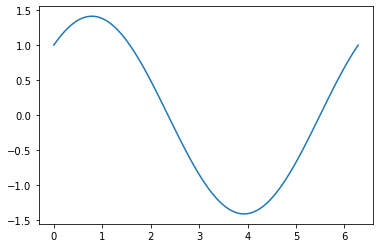

In [11]:
#adding waves

y_add = y1 + y4
plt.plot(x,y_add)
plt.show()

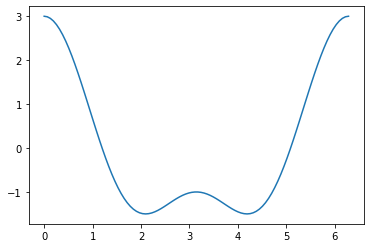

In [12]:
#adding waves 2

y_add2 = y5 + y6
plt.plot(x,y_add2)
plt.show()

/home/prachi/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


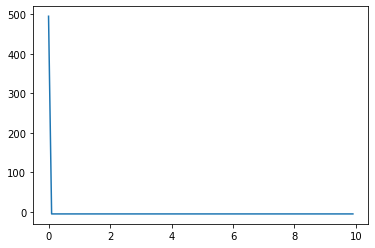

In [13]:
from scipy.fft import fft
p = np.arange(0,10,0.1)
q = fft(p)
plt.plot(p,q)

# Fourier transform

In [14]:
# EXAMPLE 1

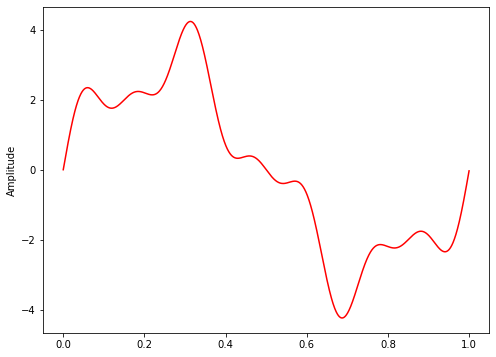

In [15]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

[3.42002433e-15 3.00000000e+03 5.88053768e-14 ... 2.76508350e-14
 5.88053768e-14 3.00000000e+03]
[   0    1    2 ... 1997 1998 1999]
1.0
[0.000e+00 1.000e+00 2.000e+00 ... 1.997e+03 1.998e+03 1.999e+03]


/home/prachi/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


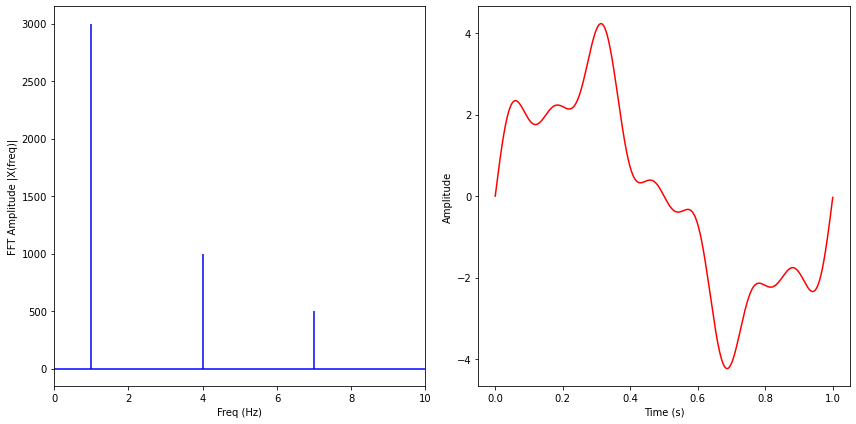

In [16]:
from numpy.fft import fft, ifft

X = fft(x)
X_val = np.abs(X)
print(X_val)
#print(X) #gives values
#print(len(X)) #2000


N = len(X)
#print(N) #2000
#-------------------------------#print(len(N)) err

n = np.arange(N)
#print(n) #[1,2,3,......1998,1999,2000]
#print(len(n)) #2000

T = N/sr   #sr = 2000
#print(T) #1.0
#-------------------------------#print(len(T)) err


freq1 = n/T 
print(n)
print(T) #to convert into float values (divided by 1.0)
print(freq1) #values
#print(len(freq)) #2000

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq1, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

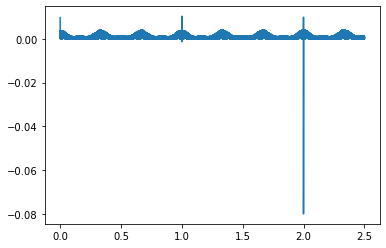

In [23]:
#Lomb scargle

frequency, power = LombScargle(freq1,np.abs(X)).autopower()
plt.plot(frequency, power) 
#plt.ylim(0,0.015)

In [18]:
#example 2

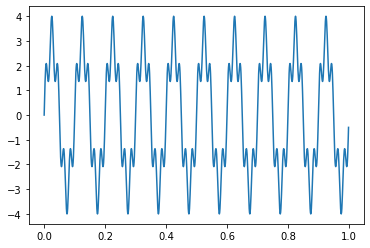

In [19]:
#with numpy

from numpy.fft import fft, ifft

axis = np.arange(0,1,0.001)
signal = 3*np.sin(2*np.pi*10*axis) + np.sin(2*np.pi*50*axis) 

plt.plot(axis,signal)

(0.0, 0.07)

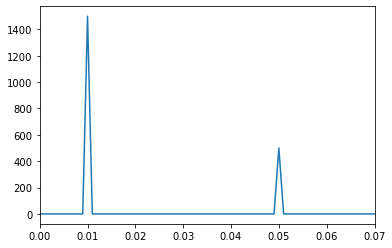

In [20]:
ft = fft(signal)
#print(ft)

#freq = np.arange(0,1,0.001)
freq = axis #find

#print (freq)
plt.plot(freq,np.abs(ft))
plt.xlim(0, 0.07)
#plt.ylim(-1, 1600)

(0.0, 0.07)

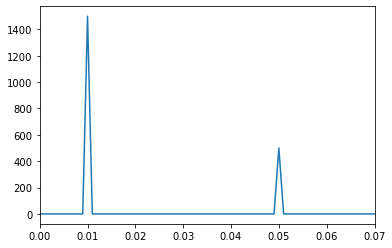

In [21]:
#with scipy fft

from scipy.fftpack import fft


ft = fft(signal)

freq = np.arange(0,1,0.001)
plt.plot(freq,np.abs(ft))
plt.xlim(0, 0.07)

(0.0, 60.0)

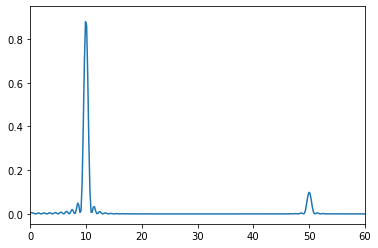

In [22]:
#lomb scargle

from astropy.timeseries import LombScargle

signal = 3*np.sin(2*np.pi*10*axis) + np.sin(2*np.pi*50*axis) 

frequency, power = LombScargle(freq,signal).autopower()
#fig = plt.figure(figsize = (10,8))
plt.plot(frequency, power) 

plt.xlim(0,60)